# Worshop 3 - Manuela Mayorga Rojas

Understanding the factors that contribute to happiness in different countries is now vitally important. Happiness scores, derived from various socioeconomic and cultural indicators, provide valuable information about well-being. In this workshop, we are presented with five CSV files containing relevant information on happiness scores in different countries, each CSV has information on one year from 2015 to 2019. Our goal is to develop a regression model capable of accurately predicting happiness scores based on the features extracted from these files. In addition, we aim to streamline the entire process, from exploratory data analysis (EDA) and training, testing and deployment of the model, ensuring the efficiency and reliability of our predictive analytics process.

#### Objectives:
- **EDA and ETL**: Perform exploratory data analysis and prepare data for modeling by cleaning, preprocessing, and selecting relevant features.
- **Regression Model Training**: Develop a regression model using a 70-30 split of data for training and testing, optimizing its performance.
- **Data Streaming with Kafka**: Implement a streaming architecture with Kafka to process real-time data from EDA/ETL to model prediction.
- **Prediction and Storage**: Use the trained model to predict happiness scores in real time and store the predictions along with the corresponding features in a database.


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

To start with the EDA, initially a brief observation of the data in the 5 csv is made, but the main idea is to unite them all in a single csv after a cleaning and certain transformations, but for this it is important a previous analysis.

### 2015

#### Read the csv

In [2]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Count rows and columns to know how much data there is.

In [3]:
num_rows, num_columns = df_2015.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 158 rows and 12 columns.


Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [4]:
data_info = {
    'Column Name': list(df_2015.columns),
    'Data Type': list(df_2015.dtypes),
    'Null Values': list(df_2015.isnull().sum()),
    'Unique Values': list(df_2015.nunique()),
    'Duplicate Values': df_2015.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,Country,object,0,158,0
1,Region,object,0,10,0
2,Happiness Rank,int64,0,157,0
3,Happiness Score,float64,0,157,0
4,Standard Error,float64,0,153,0
5,Economy (GDP per Capita),float64,0,158,0
6,Family,float64,0,158,0
7,Health (Life Expectancy),float64,0,157,0
8,Freedom,float64,0,158,0
9,Trust (Government Corruption),float64,0,157,0


#### Descriptive analysis

In [5]:
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


- Variability in Happiness: The distribution of happiness across countries is wide, with scores ranging from 2.839 to 7.587, reflecting different socioeconomic and cultural realities around the world.
- Determinants of Happiness: Aspects such as GDP per capita, quality of family relationships, life expectancy and freedom show significant variations across countries, suggesting that these factors play a crucial role in determining happiness levels.
- Trust and Generosity: Trust in government and generosity also show wide variability across countries, highlighting the importance of socio-political and cultural factors in individual and collective perceptions of happiness.
- Measurement Stability: Low standard errors suggest reasonable precision in the measurements of the various happiness factors, which increases the reliability of the results obtained.

### 2016

#### Read the csv

In [6]:
df_2016 = pd.read_csv("../data/2016.csv")
df_2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Count rows and columns to know how much data there are.

In [7]:
num_rows, num_columns = df_2016.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 157 rows and 13 columns.


Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [8]:
data_info = {
    'Column Name': list(df_2016.columns),
    'Data Type': list(df_2016.dtypes),
    'Null Values': list(df_2016.isnull().sum()),
    'Unique Values': list(df_2016.nunique()),
    'Duplicate Values': df_2016.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,Country,object,0,157,0
1,Region,object,0,10,0
2,Happiness Rank,int64,0,154,0
3,Happiness Score,float64,0,154,0
4,Lower Confidence Interval,float64,0,154,0
5,Upper Confidence Interval,float64,0,154,0
6,Economy (GDP per Capita),float64,0,157,0
7,Family,float64,0,157,0
8,Health (Life Expectancy),float64,0,156,0
9,Freedom,float64,0,157,0


#### Descriptive analysis

In [9]:
df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


- Stability in the Happiness Ranking: Although there are changes in the individual country rankings, the overall position in the happiness ranking shows relative stability compared to previous years.
- Consistent Happiness Levels: The average happiness score is similar to the previous year, indicating that, on average, happiness levels have not undergone significant changes.
- Key Happiness Factors: Aspects such as GDP per capita, quality of family relationships, life expectancy and freedom continue to be important factors influencing happiness globally.
- Trust and Generosity: Although there is variation across countries, trust in government and generosity show relative consistency compared to the previous year, highlighting their role in perceptions of happiness.
- Dystopia Residual: The increase in the dystopia residual could indicate a more negative perception of the social and political environment in general, suggesting additional challenges to happiness in some countries.

### 2017

#### Read the csv

In [10]:
df_2017 = pd.read_csv("../data/2017.csv")
df_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Count rows and columns to know how much data there is.

In [11]:
num_rows, num_columns = df_2017.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 155 rows and 12 columns.


Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [12]:
data_info = {
    'Column Name': list(df_2017.columns),
    'Data Type': list(df_2017.dtypes),
    'Null Values': list(df_2017.isnull().sum()),
    'Unique Values': list(df_2017.nunique()),
    'Duplicate Values': df_2017.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,Country,object,0,155,0
1,Happiness.Rank,int64,0,155,0
2,Happiness.Score,float64,0,151,0
3,Whisker.high,float64,0,155,0
4,Whisker.low,float64,0,155,0
5,Economy..GDP.per.Capita.,float64,0,155,0
6,Family,float64,0,155,0
7,Health..Life.Expectancy.,float64,0,155,0
8,Freedom,float64,0,155,0
9,Generosity,float64,0,155,0


#### Descriptive analysis

In [13]:
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


- Happiness Rating: The average happiness rating is similar to previous years, with an average of about 78. This suggests a continuity in the overall perception of happiness globally.
- Happiness Score: The average happiness score is about 5.35, with moderate variability between the minimum and maximum. This indicates that, overall, happiness levels have not experienced significant changes compared to previous years.
- Economy and Family: Average GDP per capita and the quality of family relationships show slightly higher values compared to previous years, suggesting possible improvements in these aspects.
- Health and Freedom: Average life expectancy and degree of freedom show similar values compared to previous years, suggesting stability in these fundamental aspects of well-being.
- Generosity and Trust: Generosity and trust in government also show similar values to previous years, indicating relative consistency in these social and political aspects.
- Dystopia Residual: The average dystopia residual is relatively low compared to previous years, which could indicate a more positive perception of the social and political environment in general.

### 2018

#### Read the csv

In [14]:
df_2018 = pd.read_csv("../data/2018.csv")
df_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


Count rows and columns to know how much data there is.

In [15]:
num_rows, num_columns = df_2018.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 156 rows and 9 columns.


Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [16]:
data_info = {
    'Column Name': list(df_2018.columns),
    'Data Type': list(df_2018.dtypes),
    'Null Values': list(df_2018.isnull().sum()),
    'Unique Values': list(df_2018.nunique()),
    'Duplicate Values': df_2018.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,Overall rank,int64,0,156,0
1,Country or region,object,0,156,0
2,Score,float64,0,154,0
3,GDP per capita,float64,0,147,0
4,Social support,float64,0,146,0
5,Healthy life expectancy,float64,0,143,0
6,Freedom to make life choices,float64,0,136,0
7,Generosity,float64,0,122,0
8,Perceptions of corruption,float64,1,110,0


In this case there is a null value in one of the values, this will be eliminated since it does not contribute much and to make the model it is necessary not to have null values. 

In [17]:
null_rows = df_2018[df_2018['Perceptions of corruption'].isnull()]
null_rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [18]:
df_2018 = df_2018.dropna(subset=['Perceptions of corruption'])
print("correctly removed row with missing values")

correctly removed row with missing values


#### Descriptive analysis

In [19]:
df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,155.0,78.877419,45.076463,1.000,40.5000,79.000,117.5000,156.000
Score,155.0,5.366897,1.117433,2.905,4.4515,5.358,6.1540,7.632
GDP per capita,155.0,0.883677,0.380942,0.000,0.6125,0.940,1.1925,1.649
Social support,155.0,1.216058,0.301286,0.000,1.0755,1.258,1.4640,1.644
Healthy life expectancy,155.0,0.596877,0.248312,0.000,0.4205,0.643,0.7785,1.030
Freedom to make life choices,155.0,0.455606,0.162367,0.000,0.3575,0.493,0.5790,0.724
Generosity,155.0,0.180974,0.098789,0.000,0.1090,0.173,0.2400,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.0510,0.082,0.1370,0.457


- Overall Happiness Rating: The average happiness rating remains in line with previous years, with an average of approximately 78.9. This indicates relative consistency in the overall perception of happiness.
- Happiness Score: The average happiness score is similar to previous years, at around 5.38. This suggests stability in happiness levels compared to previous years.
- GDP per capita and Social Support: Average GDP per capita and social support show moderate values, indicating some stability in the economic and social aspects that influence happiness.
- Healthy Life Expectancy and Freedom: Healthy life expectancy and freedom to make life choices also show moderate values, suggesting a continuity in the importance of these factors for overall well-being.
- Generosity and Perception of Corruption: Average generosity is moderate, while perception of corruption is relatively low. This indicates relative stability in the willingness to help others and an overall perception of low corruption, which could contribute to higher levels of happiness.

### 2019

#### Read the csv

In [20]:
df_2019 = pd.read_csv("../data/2019.csv")
df_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Count rows and columns to know how much data there is.

In [21]:
num_rows, num_columns = df_2019.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 156 rows and 9 columns.


Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [22]:
data_info = {
    'Column Name': list(df_2019.columns),
    'Data Type': list(df_2019.dtypes),
    'Null Values': list(df_2019.isnull().sum()),
    'Unique Values': list(df_2019.nunique()),
    'Duplicate Values': df_2019.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,Overall rank,int64,0,156,0
1,Country or region,object,0,156,0
2,Score,float64,0,155,0
3,GDP per capita,float64,0,146,0
4,Social support,float64,0,145,0
5,Healthy life expectancy,float64,0,119,0
6,Freedom to make life choices,float64,0,130,0
7,Generosity,float64,0,118,0
8,Perceptions of corruption,float64,0,113,0


#### Descriptive analysis

In [23]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


- Overall Happiness Rating: The average happiness rating remains consistent with previous years, with an average of approximately 78.5. This suggests that, overall, there have been no significant changes in the overall perception of happiness.
- Happiness Score: The average happiness score is slightly higher than in previous years, with an average of approximately 5.41. This may indicate an overall improvement in happiness levels compared to previous years.
- GDP per capita and Social Support: Average GDP per capita and social support continue to show moderate and stable values, suggesting continuity in the economic and social aspects that influence happiness.
- Healthy Life Expectancy and Freedom: Healthy life expectancy and freedom to make life choices also show moderate and stable values, suggesting a continuity in the importance of these factors for overall well-being.
- Generosity and Perception of Corruption: Average generosity and perception of corruption continue to show similar values to previous years, indicating relative stability in the willingness to help others and in the perception of corruption in society.

According to the descriptive statistics we see that these data indicate a relative stability in the factors influencing happiness globally, with a slight positive trend in happiness levels in recent years. This highlights the importance of addressing socioeconomic, health and political factors to promote human well-being worldwide.

##### **Important**

As observed in the 5 csv there are different numbers of columns and amount of data, this will be something important and challenging, as it implies a problem to perform the final data integration. That is why we are going to make a comparison of the number of columns and the names, in order to perform the standardization process or elimination of unnecessary columns. This is very important to achieve the objective of making a regression model with the right data. 

#### Comparison of the columns

In the previous analysis we see that the number of rows between the data is not very large since they range from 155 to 158 rows, the problem lies in the number of columns and their names, for this reason we will make a comparison between the columns and identify the differences. 


In [24]:
columnas_df_2015 = list(df_2015.columns)
columnas_df_2016 = list(df_2016.columns)
columnas_df_2017 = list(df_2017.columns)
columnas_df_2018 = list(df_2018.columns)
columnas_df_2019 = list(df_2019.columns)

longitud_maxima = max(len(columnas) for columnas in [columnas_df_2015, columnas_df_2016, columnas_df_2017, columnas_df_2018, columnas_df_2019])
for columnas in [columnas_df_2015, columnas_df_2016, columnas_df_2017, columnas_df_2018, columnas_df_2019]:
    while len(columnas) < longitud_maxima:
        columnas.append(None)

data = {
    'df_2015': columnas_df_2015,
    'df_2016': columnas_df_2016,
    'df_2017': columnas_df_2017,
    'df_2018': columnas_df_2018,
    'df_2019': columnas_df_2019
}
columns_df = pd.DataFrame(data)
columns_df

,df_2015,df_2016,df_2017,df_2018,df_2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


Previously there was a previous analysis of the columns contained in each dataset, here we see more clearly the comparison between them, and it is observed that there are columns that have the same information but with different names, for example in 2018 and 2019 "Overall rank" is the column that in the three years has the Happiness Score, and this happens with several columns, but something also remarkable is that in the 2017 dataset the columns are separated by dots, for this a due process will be done and also to rename the columns.

We use regular expressions to clean up the column names

In [25]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]

def clean_column_names(df):
    clean_columns = []
    for col in df.columns:
        normalized = re.sub(r'[\.\(\)]', '_', col.replace(' ', '_').lower())
        normalized = re.sub(r'[^a-zA-Z0-9_]', '', normalized)
        normalized = re.sub(r'_{2,}', '_', normalized)
        normalized = normalized.strip('_')
        clean_columns.append(normalized)
    df.columns = clean_columns

for df in dataframes:
    clean_column_names(df)

In [26]:
dataframes= [df_2015, df_2016, df_2017, df_2018, df_2019]
for df in dataframes:
    print(df.columns)

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual'],
      dtype='object')
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual'],
      dtype='object')
Index(['country', 'happiness_rank', 'happiness_score', 'whisker_high',
       'whisker_low', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'generosity',
       'trust_government_corruption', 'dystopia_residual'],
      dtype='object')
Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices

We see that the columns are now clean, so to handle the same standard, let's rename the columns that have the same information

#### Rename Columns

In [27]:
#2015, 2016, 2017
names_column = {'economy_gdp_per_capita':'gdp_per_capita',
                'trust_government_corruption':'perceptions_of_corruption',
                'family':'social_support'}

In [28]:
#2018 y 2019
columns_2018_2019 = {'overall_rank':'happiness_rank',
                'score':'happiness_score',
                'freedom_to_make_life_choices':'freedom',
                'country_or_region':'country',
                'healthy_life_expectancy' : 'health_life_expectancy'}

In [29]:
def rename_col(df : pd.DataFrame, column_names : dict):
    df.rename(columns=column_names, inplace=True)

rename_col(df_2018, columns_2018_2019)
rename_col(df_2019, columns_2018_2019)
rename_col(df_2015, names_column)
rename_col(df_2016, names_column)
rename_col(df_2017, names_column)

#### Delete columns
We will delete the columns that will not be used in the model.

In [30]:
df_2015.drop(columns=['region', 'standard_error', 'dystopia_residual'], inplace=True)
df_2016.drop(columns=['region', 'lower_confidence_interval', 'upper_confidence_interval', 'dystopia_residual'], inplace=True)
df_2017.drop(columns=['whisker_high', 'whisker_low', 'dystopia_residual'], inplace=True)

In [31]:
column_order = ['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']

for df in dataframes:
    df = df.reindex(columns=column_order)
    print(df.columns)

Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions

These columns were chosen because the purpose is to predict the level of happiness, a research was conducted where the results found were the following: "It is determined by GDP per capita, social support, healthy life expectancy, freedom to make life decisions, generosity and perception of corruption". (the reference is at the end of the notebook).

#### Concatenation of datasets

In [32]:
concat_column_order = ['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita', 'social_support' ,'health_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']

df = pd.concat(dataframes, axis=0, ignore_index=True)
df = df.reindex(columns=concat_column_order)
df.head(5)

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,perceptions_of_corruption
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


**Description columns**
- ***happiness Rank***: Rank of the country based on the Happiness Score.
- ***country***: Name of the country
- ***happiness_score***: A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"
- ***gdp_per_capita***: The extent to which GDP contributes to the calculation of the Happiness Score.
- ***social_support***: The extent to which social support contributes to the calculation of the Happiness Score
- ***health_life_expectancy***: The extent to which Life expectancy contributed to the calculation of the Happiness Score
- ***freedom***: The extent to which Freedom contributed to the calculation of the Happiness Score
- ***generosity***: The extent to which Generosity contributed to the calculation of the Happiness Score
- ***perceptions_of_corruption***:The extent to which Perception of Corruption contributes to Happiness Score

*The source from which the data were taken can be found in references*

Count of rows and columns to know how much data there are

In [33]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 781 rows and 9 columns.


In [34]:
df.columns

Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'health_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

Data dictionary to identify the number of null values, data types, unique values and duplicate values.

In [35]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique()),
    'Duplicate Values': df.duplicated().sum()
}

info_table = pd.DataFrame(data_info)
info_table

,Column Name,Data Type,Null Values,Unique Values,Duplicate Values
0,happiness_rank,int64,0,158,0
1,country,object,0,170,0
2,happiness_score,float64,0,715,0
3,gdp_per_capita,float64,0,741,0
4,social_support,float64,0,731,0
5,health_life_expectancy,float64,0,704,0
6,freedom,float64,0,696,0
7,generosity,float64,0,663,0
8,perceptions_of_corruption,float64,0,635,0


We see that we have no null values or duplicate values.

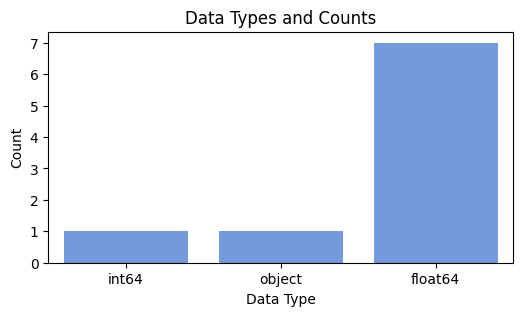

In [36]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Data Type', data=info_table, color='cornflowerblue')
plt.title('Data Types and Counts')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

According to this diagram the types of each column with raw data are as follows:

- *intergers*: 1
- *object*: 1
- *float*: 7

#### Descriptive analysis

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_rank,781.0,78.773367,45.162398,1.000,40.00000,79.000000,118.000000,158.000000
happiness_score,781.0,5.377232,1.127071,2.693,4.50900,5.321000,6.182000,7.769000
gdp_per_capita,781.0,0.914537,0.405403,0.000,0.60500,0.982000,1.233748,1.870766
social_support,781.0,1.078780,0.329581,0.000,0.87021,1.125000,1.328000,1.644000
health_life_expectancy,781.0,0.612342,0.248459,0.000,0.44006,0.647239,0.808000,1.141000
freedom,781.0,0.411254,0.152911,0.000,0.31048,0.431000,0.531000,0.724000
generosity,781.0,0.218618,0.122394,0.000,0.13000,0.202000,0.279060,0.838075
perceptions_of_corruption,781.0,0.125436,0.105816,0.000,0.05400,0.091000,0.156030,0.551910


- Average happiness level: The average happiness score is 5.38 on a scale of 1 to 10. This suggests that, in general, countries have a moderate level of life satisfaction.
- Variety in economic development: The average GDP per capita is 0.91, indicating that there is a wide range of levels of economic development among the countries included in the study.
- Social support: Most countries have a relatively high level of social support, with an average of 1.08. This suggests that community and social support networks are important for overall well-being.
- Health and life expectancy: The average healthy life expectancy is 0.61, suggesting that, on average, populations have access to a moderate level of health care and life expectancy.
- Freedom: The average freedom is 0.41, indicating that perceptions of freedom vary across countries, but overall, there is a moderate degree of perceived freedom.
- Perceptions of corruption: Perceptions of corruption are relatively low on average, with a mean value of 0.13 on a scale of 0 to 1. This suggests that, in general, corruption is not perceived to be rampant in most of the countries surveyed.

In summary, at a general level, the countries have a moderate level of happiness and economic development, with high levels of social support and health, although perceptions of freedom and corruption may vary considerably between countries.

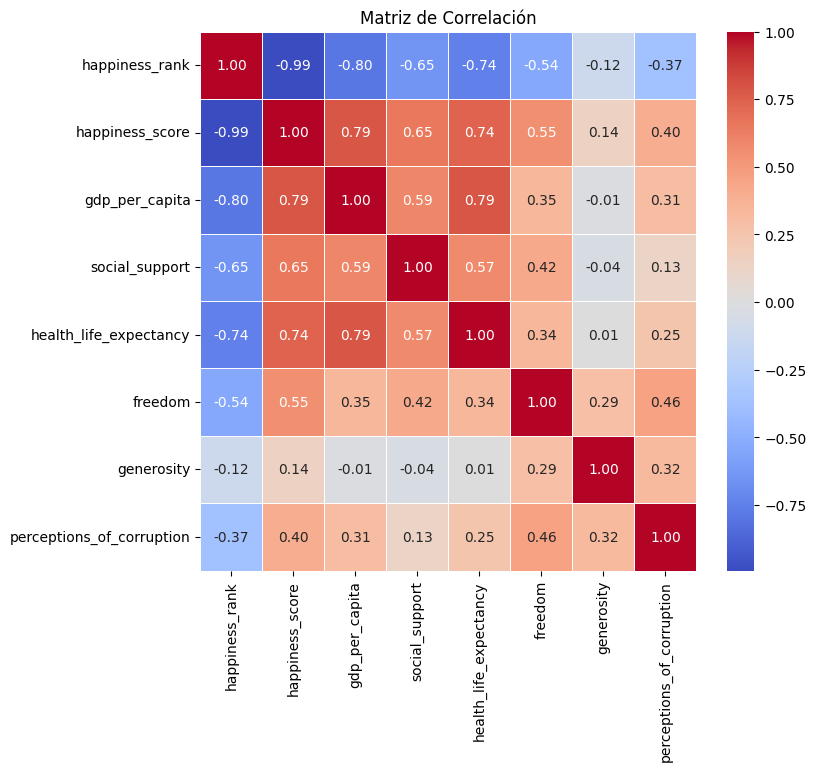

In [38]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

- The happiness score has a relatively high positive correlation with GDP per capita (0.79), healthy life expectancy (0.74) and social support (0.65). This suggests that in general, countries with higher GDP per capita, better health and more social support tend to have higher happiness scores.
- Generosity has weaker correlations with other variables, the strongest being with perception of corruption (0.32). This suggests that there is a small tendency for countries perceived as less corrupt to also be slightly more generous.
- Freedom has a moderate correlation with perception of corruption (0.46) and a weaker correlation with GDP per capita (0.35). This could indicate that in countries with less perceived corruption, there is a greater sense of freedom, and in countries with higher GDP per capita, there may be greater freedom, although the relationship is not as strong.
- Corruption perception has moderate correlations with happiness score (0.40) and freedom (0.46). This suggests that the perception of corruption may influence the level of happiness and the feeling of freedom in a country.

The happiness_rank has an extremely high and negative correlation with the happiness_score (-0.99). This indicates that both variables contain almost the same information but on opposite scales. Including both in the model does not add additional value and may cause multicollinearity problems. This multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can inflate the variances of the regression coefficients and make the model less reliable.

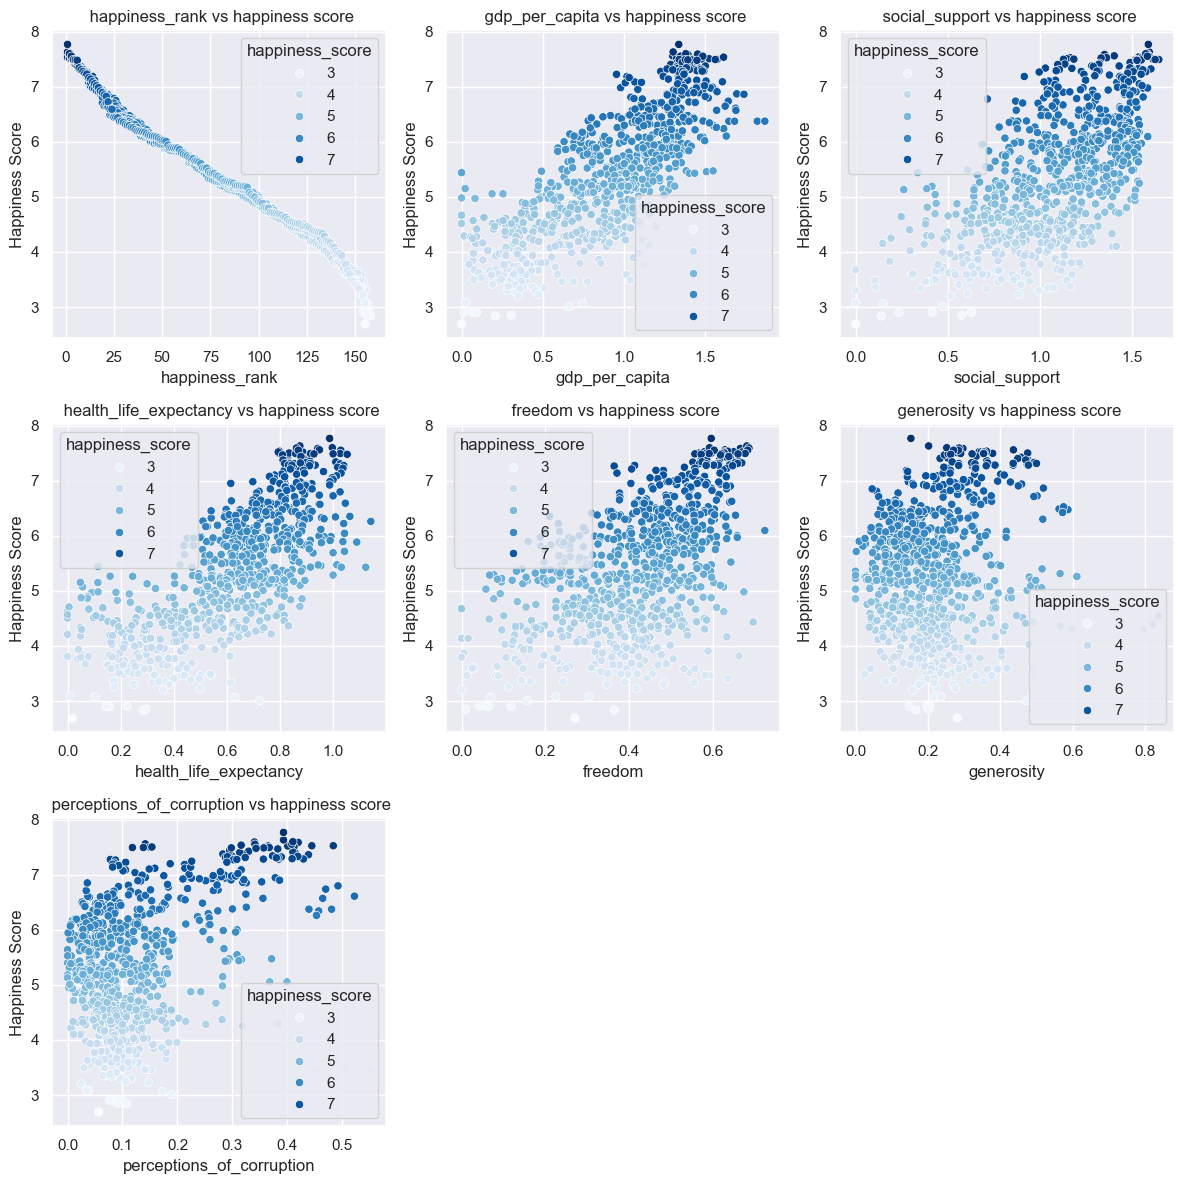

In [39]:
sns.set(color_codes=True)
plt.figure(figsize=(12, 12))

for idx, variable in enumerate(numeric_columns.columns.drop('happiness_score')):
    plt.subplot(3, 3, idx + 1)
    sns.scatterplot(x=variable, y='happiness_score', hue='happiness_score', data=df, palette='Blues')
    plt.title(f' {variable} vs happiness score')
    plt.xlabel(variable)
    plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

These graphs suggest that factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, and generosity are positively correlated with happiness score, while perception of corruption is negatively correlated with happiness.

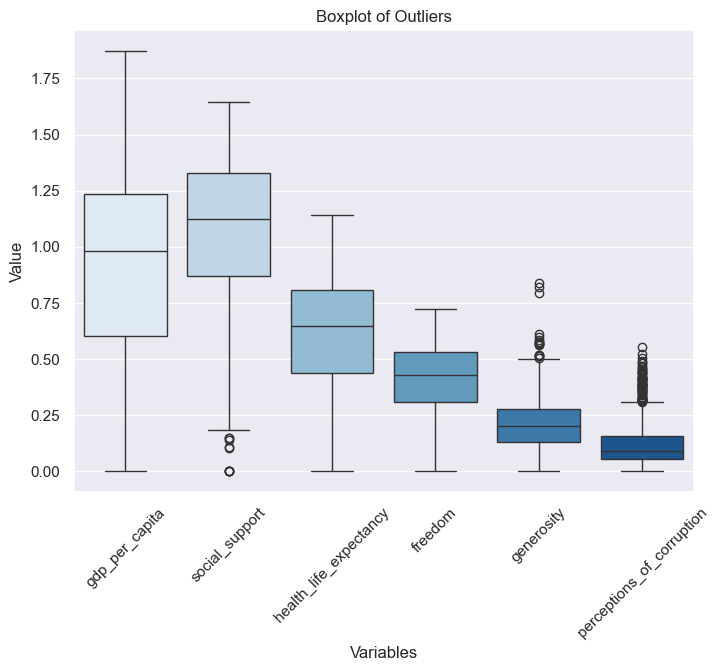

In [40]:
delete_column = numeric_columns.drop(columns=['happiness_rank', 'happiness_score'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=delete_column, palette='Blues')
plt.title('Boxplot of Outliers')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

We can observe the presence of outliers in certain columns, since the purpose of the workshop is to perform a prediction model and modifying or altering the outliers could distort the representation of the data, leading to misleading results. If these outliers are removed or modified, valuable information could be lost or even bias the model results. In this case, the happiness_score and happiness_rank columns were not included, initially because the happiness_score column will be evaluated separately and the happiness_rank column will not be included in the analysis for the reasons mentioned above.

#### Column country

We start by looking at which and how many countries are in the dataset.

In [41]:
unique_countries = df['country'].unique()
unique_countries

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [42]:
total_countries = len(unique_countries)
total_countries

170

In the choropleth map we can see the countries with the highest level of happiness score

In [43]:
data = go.Choropleth(
    locations=df['country'],
    locationmode='country names',
    z=df['happiness_score'], 
    text=df['country'],
    colorbar={'title':'Happiness'},
    colorscale='Viridis' 
)

layout = go.Layout(
    title='Global Happiness', 
    geo=dict(showframe=False, projection={'type': 'natural earth'})
)

choromap3 = go.Figure(data=data, layout=layout)
choromap3.show()

The countries with the yellow color are the ones with the highest level of happiness, in this case it seems to be Switzerland and Canada, but a deeper analysis will be made as the analysis progresses.

To make a model we have thought to include the country variable but we have observed that there are many countries, so we will divide the countries in 6 continents, in order to have a better management of this column and not to waste it for the analysis. The country column will be deleted later as it will not be used.


In [44]:
def continent(df : pd.DataFrame) -> pd.DataFrame:
    
    country_to_continent = {
         'New Zealand': 'Oceania',
        'Australia': 'Oceania',
        'Czech Republic': 'Europe',
        'Northern Cyprus': 'Europe',
        'Ireland': 'Europe',
        'Switzerland': 'Europe',
        'Belgium': 'Europe',
        'Finland': 'Europe',
        'North Macedonia': 'Europe',
        'Iceland': 'Europe',
        'United Kingdom': 'Europe',
        'Netherlands': 'Europe',
        'Denmark': 'Europe',
        'Slovenia': 'Europe',
        'Lithuania': 'Europe',
        'Norway': 'Europe',
        'Russia': 'Europe',
        'Austria': 'Europe',
        'Montenegro': 'Europe',
        'Cyprus': 'Europe',
        'North Cyprus': 'Europe',
        'Kosovo': 'Europe',
        'Romania': 'Europe',
        'Hungary': 'Europe',
        'Serbia': 'Europe',
        'Portugal': 'Europe',
        'Estonia': 'Europe',
        'Latvia': 'Europe',
        'Greece': 'Europe',
        'Macedonia': 'Europe',
        'Albania': 'Europe',
        'Bosnia and Herzegovina': 'Europe',
        'Croatia': 'Europe',
        'Sweden': 'Europe',
        'Luxembourg': 'Europe',
        'Spain': 'Europe',
        'Italy': 'Europe',
        'Moldova': 'Europe',
        'Malta': 'Europe',
        'Ukraine': 'Europe',
        'France': 'Europe',
        'Slovakia': 'Europe',
        'Bulgaria': 'Europe',
        'Germany': 'Europe',
        'Peru': 'South America',
        'Uruguay': 'South America',
        'Bolivia': 'South America',
        'Argentina': 'South America',
        'Colombia': 'South America',
        'Venezuela': 'South America',
        'Paraguay': 'South America',
        'Chile': 'South America',
        'Brazil': 'South America',
        'Ecuador': 'South America',
        'Suriname': 'South America',
        'Trinidad and Tobago': 'North America',
        'El Salvador': 'North America',
        'Nicaragua': 'North America',
        'Guatemala': 'North America',
        'Canada': 'North America',
        'Honduras': 'North America',
        'Costa Rica': 'North America',
        'Belize': 'North America',
        'Trinidad & Tobago': 'North America',
        'Puerto Rico': 'North America',
        'Haiti': 'North America',
        'Dominican Republic': 'North America',
        'Jamaica': 'North America',
        'Panama': 'North America',
        'Mexico': 'North America',
        'United States': 'North America',
        'Palestinian Territories': 'Asia',
        'Bangladesh': 'Asia',
        'Thailand': 'Asia',
        'Bahrain': 'Asia',
        'Japan': 'Asia',
        'Malaysia': 'Asia',
        'Saudi Arabia': 'Asia',
        'Uzbekistan': 'Asia',
        'United Arab Emirates': 'Asia',
        'Kazakhstan': 'Asia',
        'Taiwan': 'Asia',
         'Syria': 'Asia',
        'Taiwan Province of China': 'Asia',
        'Yemen': 'Asia',
        'Afghanistan': 'Asia',
        'Hong Kong S.A.R., China': 'Asia',
        'Cambodia': 'Asia',
        'Oman': 'Asia',
        'Singapore': 'Asia',
        'Israel': 'Asia',
        'South Korea': 'Asia',
        'Kuwait': 'Asia',
        'Qatar': 'Asia',
        'Myanmar': 'Asia',
        'Tajikistan': 'Asia',
        'Philippines': 'Asia',
        'Hong Kong': 'Asia',
        'Bhutan': 'Asia',
        'Azerbaijan': 'Asia',
        'Pakistan': 'Asia',
        'Jordan': 'Asia',
        'Kyrgyzstan': 'Asia',
        'Turkmenistan': 'Asia',
        'China': 'Asia',
        'Indonesia': 'Asia',
        'Vietnam': 'Asia',
        'Turkey': 'Asia',
        'Armenia': 'Asia',
        'Laos': 'Asia',
        'Mongolia': 'Asia',
        'India': 'Asia',
        'Georgia': 'Asia',
        'Iraq': 'Asia',
        'Sri Lanka': 'Asia',
        'Lebanon': 'Asia',
        'Nepal': 'Asia',
        'Iran': 'Asia',
        'South Africa': 'Africa',
        'Ghana': 'Africa',
        'Zimbabwe': 'Africa',
        'Tunisia': 'Africa',
        'Liberia': 'Africa',
        'Sudan': 'Africa',
        'Congo (Kinshasa)': 'Africa',
        'Ethiopia': 'Africa',
        'Sierra Leone': 'Africa',
        'Mauritania': 'Africa',
        'Kenya': 'Africa',
        'Djibouti': 'Africa',
        'Botswana': 'Africa',
        'Mauritius': 'Africa',
        'Libya': 'Africa',
        'Mozambique': 'Africa',
        'Lesotho': 'Africa',
        'Somaliland region': 'Africa',
        'Morocco': 'Africa',
        'Nigeria': 'Africa',
        'Swaziland': 'Africa',
        'Algeria': 'Africa',
        'Zambia': 'Africa',
        'Malawi': 'Africa',
        'Cameroon': 'Africa',
        'Egypt': 'Africa',
        'Angola': 'Africa',
        'Burkina Faso': 'Africa',
        'Congo (Brazzaville)': 'Africa',
        'Somaliland Region': 'Africa',
        'Comoros': 'Africa',
        'Uganda': 'Africa',
        'South Sudan': 'Africa',
        'Senegal': 'Africa',
        'Burundi': 'Africa',
        'Namibia': 'Africa',
        'Somalia': 'Africa',
        'Mali': 'Africa',
        'Ivory Coast': 'Africa',
        'Gabon': 'Africa',
        'Niger': 'Africa',
        'Gambia': 'Africa',
        'Tanzania': 'Africa',
        'Madagascar': 'Africa',
        'Benin': 'Africa',
        'Central African Republic': 'Africa',
        'Chad': 'Africa',
        'Rwanda': 'Africa',
        'Togo': 'Africa',
        'Guinea': 'Africa'
    }
    
    df['continent'] = df['country'].map(country_to_continent)
    return df

df = continent(df)

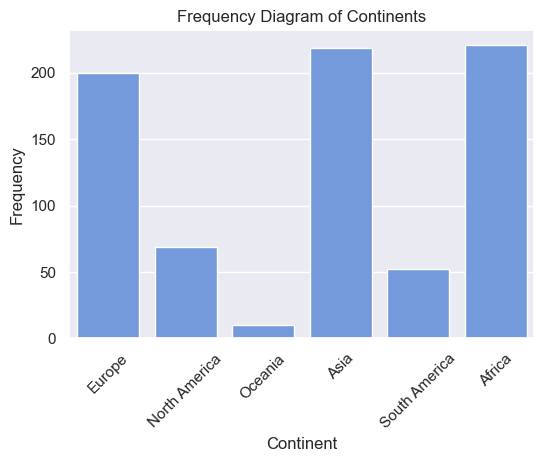

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x='continent', data=df, color='cornflowerblue')
plt.title('Frequency Diagram of Continents')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In this bar chart we observe the frequency of each continent and we can see that Africa is the continent with the highest frequency, which is quite logical since it is the continent with the most countries.

#### Column happiness score

We start by verifying the range of values in the column

In [46]:
max_happiness_score, min_happiness_score = df['happiness_score'].max(), df['happiness_score'].min()
print(f"The maximum value is: {max_happiness_score}, and the minimum value is: {min_happiness_score}")


The maximum value is: 7.769, and the minimum value is: 2.69300007820129


We observe that the happiness_score values range from 2 to 7, apparently there is no score that is considered to be sufficiently somewhat or very low considering it on a scale of 0 to 10. This could indicate that the results tend to give scores that are relatively close to the center of the happiness scale, which could reflect a distribution of happiness that is concentrated in the middle range.

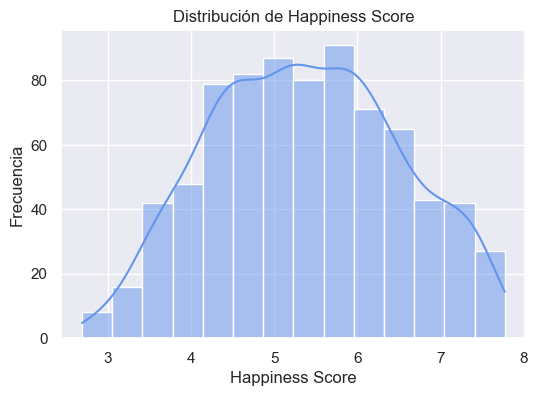

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(df['happiness_score'], kde=True, color='cornflowerblue')
plt.title('Distribución de Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()

This distribution has the data concentrated around the mean happiness score, this could be interpreted as an indicator that the majority of the data have similar levels of happiness or are in comparable life situations, another important aspect could be due to the way of life which affects these levels of happiness which causes there to be an absence of extremely high or low values which could suggest that there are few cases of extreme happiness or depression in the sample or population studied.

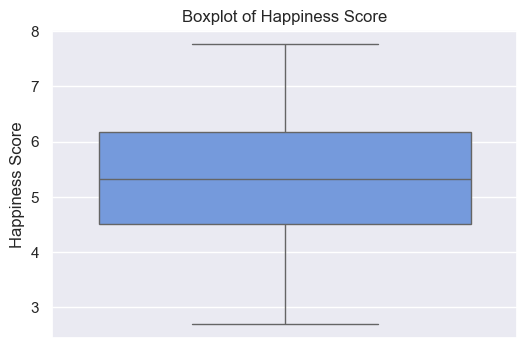

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['happiness_score'], color='cornflowerblue')
plt.title('Boxplot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()

As mentioned above, the data have no outliers, and have a fairly centralized mean. 

In [49]:
country_happiness = df.groupby(['country'], sort=False)['happiness_score'].max().head(10)
country_happiness

country
Switzerland    7.587
Iceland        7.561
Denmark        7.600
Norway         7.594
Canada         7.427
Finland        7.769
Netherlands    7.488
Sweden         7.364
New Zealand    7.334
Australia      7.313
Name: happiness_score, dtype: float64

These countries that have higher levels of happiness are generally considered to be developed countries and have common characteristics that can contribute to their high happiness scores, such as economic stability, high quality of life, well-developed health and education systems, solid infrastructure and access to quality public services, high standards of equity and social justice, and all of these factors are often associated with higher levels of well-being and happiness.

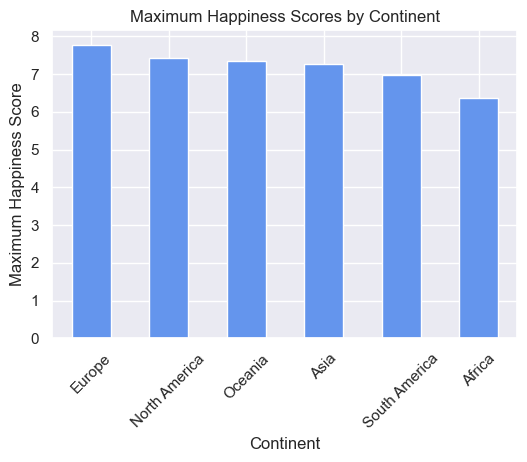

In [50]:
continent_happiness = df.groupby(['continent'], sort=False)['happiness_score'].max()

plt.figure(figsize=(6, 4))
continent_happiness.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum Happiness Scores by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Happiness Score')
plt.xticks(rotation=45) 
plt.show()

The level of happiness on each continent can be influenced by a combination of economic, social, political and cultural factors specific to each region. Continents with higher levels of happiness tend to have stable economies, strong social welfare systems, high quality of life and cultural values that promote well-being and citizen satisfaction.

#### Column gdp per capita

In [51]:
max_gdp_per_capita, min_gdp_per_capita = df['gdp_per_capita'].max(), df['gdp_per_capita'].min()
print(f"The maximum GDP per capita value is: {max_gdp_per_capita}, and the minimum value is: {min_gdp_per_capita}")


The maximum GDP per capita value is: 1.87076568603516, and the minimum value is: 0.0


The difference between the maximum and minimum value of Gross Domestic Product (GDP) per capita is quite significant. This may indicate a large economic disparity represented in the data. The existence of a minimum value of 0.0 could indicate the presence of countries or regions where GDP per capita has not been recorded or has been recorded as zero, which could be due to various reasons, such as lack of data, conflicts, natural disasters or other extreme circumstances. On the other hand, the maximum value suggests the presence of regions with a high level of economic wealth per capita. It is important to consider the socioeconomic context of the data when analyzing indicators such as GDP per capita, as there may be various factors that alter or skew its result. 

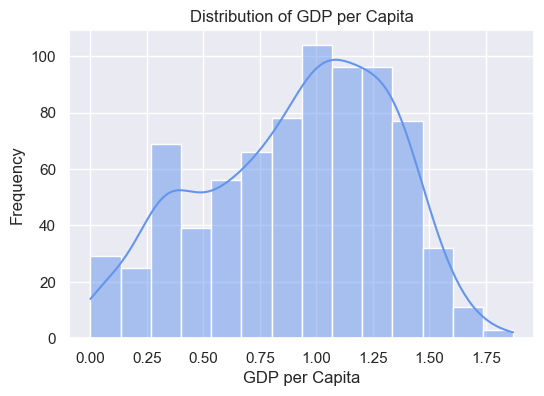

In [52]:
plt.figure(figsize=(6, 4))
sns.histplot(df['gdp_per_capita'], kde=True, color='cornflowerblue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

Here we have an asymmetric distribution which indicates a greater inequality. We observe that there is a great amount of frequency for values between 1.00 and 1.25, but there are many other values that are at a low level, this could be an important advantage for the analysis of happiness. 

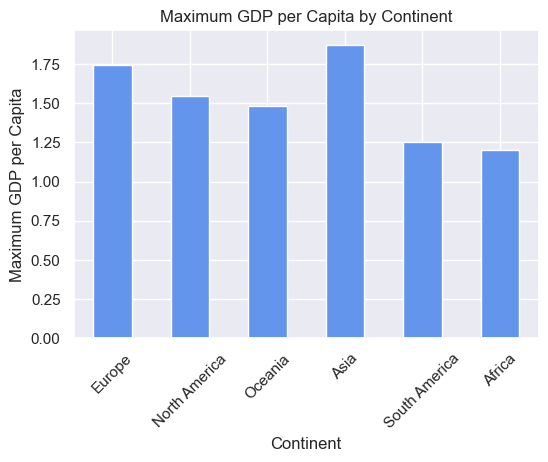

In [53]:
continent_gdp = df.groupby(['continent'], sort=False)['gdp_per_capita'].max()

plt.figure(figsize=(6, 4))
continent_gdp.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum GDP per Capita by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum GDP per Capita')
plt.xticks(rotation=45)  
plt.show()

 Asia and Europe have the highest average GDP per capita values, followed by North America and Oceania. On the other hand, Africa and South America show the lowest values. This variation reflects differences in economic development, political stability, infrastructure, natural resources and other factors that influence economic prosperity in each region. 

#### Column social support

In [54]:
max_social_support, min_social_support = df['social_support'].max(), df['social_support'].min()
print(f"The maximum value of social_support is: {max_social_support}, and the minimum value is: {min_social_support}")

The maximum value of social_support is: 1.644, and the minimum value is: 0.0


The fact that the minimum value is 0.0 suggests that there are observations in the data set where no level of social support has been recorded. This could indicate that in some locations, lack of social support may be a major problem. On the other hand, the maximum value of 1.644 indicates that there are observations where the level of social support is quite high. This may reflect the presence of strong social policies, strong community support networks, or a culture that values and promotes mutual support and solidarity.

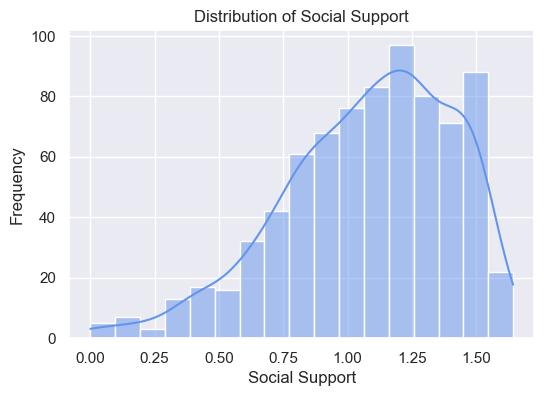

In [55]:
plt.figure(figsize=(6, 4))
sns.histplot(df['social_support'], kde=True, color='cornflowerblue')
plt.title('Distribution of Social Support')
plt.xlabel('Social Support')
plt.ylabel('Frequency')
plt.show()

The distribution of the social_support variable shows a concentration of values in the medium-high range, with a skewness to the left. This indicates that most observations tend to have moderate to high levels of social support, with fewer observations registering lower levels of support. This distribution of the social_support variable reveals that, in general, there is a significant level of social support among the observations analyzed, but there is also notable variability in the levels of social support among the different observations. This may reflect differences in social policies, community support networks and social structures between the regions or countries represented in the dataset.

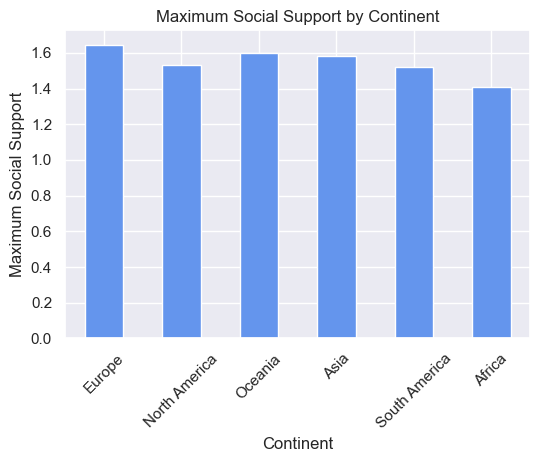

In [56]:
continent_social_support = df.groupby(['continent'], sort=False)['social_support'].max()

plt.figure(figsize=(6, 4))
continent_social_support.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum Social Support by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Social Support')
plt.xticks(rotation=45)  
plt.show()

The data show that Europe and Oceania have the highest level of average social support among the continents, while Africa has the lowest level. This suggests that social policies and community support networks are stronger in Europe compared to the other continents, which may contribute to the well-being and satisfaction of its inhabitants. On the other hand, it could be said that Africa faces significant challenges in terms of access to social support.

#### Column healthy life expentancy

In [57]:
max_health_life_expectancy, min_health_life_expectancy = df['health_life_expectancy'].max(), df['health_life_expectancy'].min()
print(f"The maximum value of health_life_expectancy is: {max_health_life_expectancy}, and the minimum value is: {min_health_life_expectancy}")

The maximum value of health_life_expectancy is: 1.141, and the minimum value is: 0.0


The minimum value of 0.0 could indicate that there are observations where no life expectancy has been recorded, which could be due to lack of data or extreme conditions that preclude life in that region. On the other hand, the maximum value of 1.141 indicates that there are observations where life expectancy is relatively high. This may be a reflection of regions or countries with robust health systems, access to quality medical care, and favorable living conditions that promote a longer and healthier life.

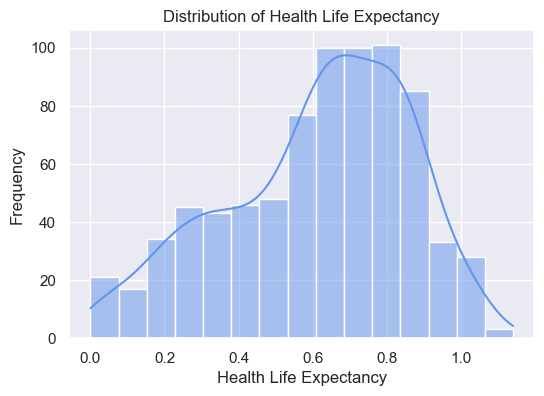

In [58]:
plt.figure(figsize=(6, 4))
sns.histplot(df['health_life_expectancy'], kde=True, color='cornflowerblue')
plt.title('Distribution of Health Life Expectancy')
plt.xlabel('Health Life Expectancy')
plt.ylabel('Frequency')
plt.show()

The distribution of the health_life_expectancy column shows a skewness to the left, indicating that the left tail of the distribution is longer than the right. This suggests that there are more values concentrated on the right side of the distribution and relatively lower values on the left side. The presence of higher values of life expectancy indicates that some countries or regions have achieved significant levels of health and well-being, possibly due to effective health policies, access to adequate health services and favorable living conditions. However, the leftward asymmetry also suggests that there are public health challenges facing many regions, such as limited access to medical care, prevalent diseases or unfavorable environmental conditions that may affect life expectancy.

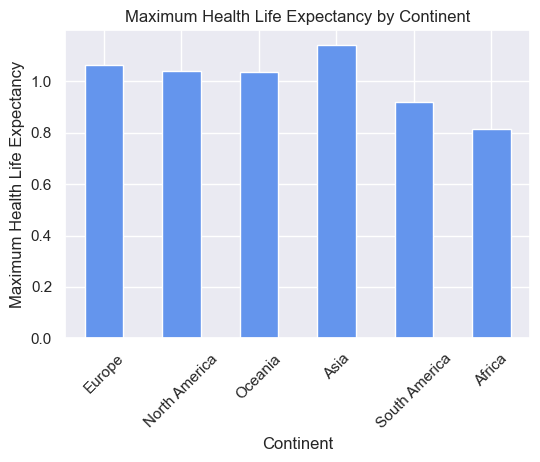

In [59]:
continent_health = df.groupby(['continent'], sort=False)['health_life_expectancy'].max()

plt.figure(figsize=(6,4))
continent_health.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum Health Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Health Life Expectancy')
plt.xticks(rotation=45)
plt.show()

Asia has the highest life expectancy, followed closely by Europe, North America and Oceania. South America shows a medium life expectancy, while Africa has the lowest life expectancy. These differences reflect significant disparities in health and well-being between continents.

#### Column freedom

In [60]:
max_freedom, min_freedom = df['freedom'].max(), df['freedom'].min()
print(f"The maximum value of freedom is: {max_freedom}, and the minimum value is: {min_freedom}")

The maximum value of freedom is: 0.724, and the minimum value is: 0.0


The minimum value of 0.0 suggests that there are observations where no level of freedom has been recorded. This could indicate the presence of significant restrictions on individual freedom in some regions or countries represented in the data set. On the other hand, the maximum value of 0.724 indicates that there are observations where a fairly high level of freedom is recorded. This could reflect the presence of policies or social conditions that promote individual freedom and autonomy in those countries.

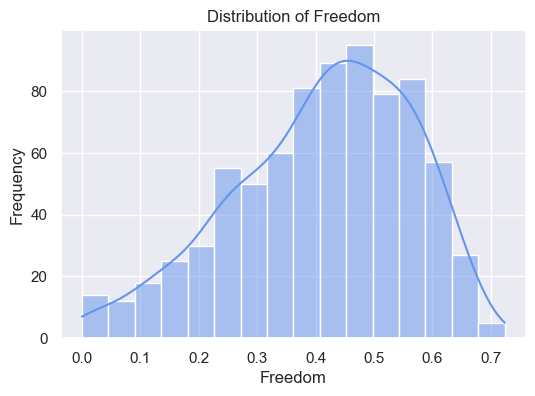

In [61]:
plt.figure(figsize=(6, 4))
sns.histplot(df['freedom'], kde=True, color='cornflowerblue')
plt.title('Distribution of Freedom')
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.show()

The asymmetric distribution to the left of the "freedom" column highlights the importance of individual autonomy and suggests that most of the regions represented in the data set have relatively high levels of freedom compared to lower levels.

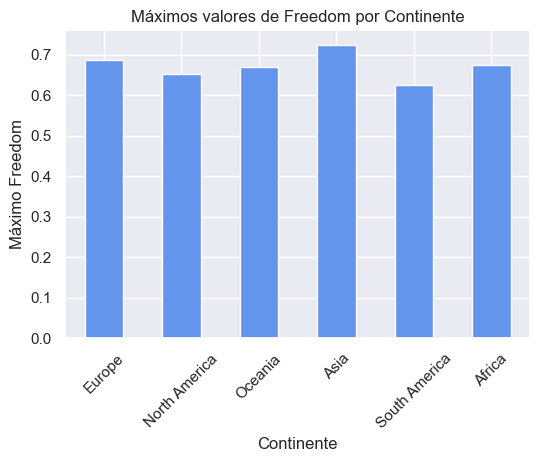

In [62]:
continent_freedom = df.groupby(['continent'], sort=False)['freedom'].max()

plt.figure(figsize=(6, 4))
continent_freedom.plot(kind='bar', color='cornflowerblue')
plt.title('Máximos valores de Freedom por Continente')
plt.xlabel('Continente')
plt.ylabel('Máximo Freedom')
plt.xticks(rotation=45)
plt.show()

These data show variations in levels of freedom between continents, with Asia leading the way and North and South America showing lower average values. These differences may reflect a variety of factors, including cultural differences, government policies and socioeconomic conditions in each region.

#### Column generosity

In [63]:
max_generosity, min_generosity = df['generosity'].max(), df['generosity'].min()
print(f"The maximum value of generosity is: {max_generosity}, and the minimum value is: {min_generosity}")

The maximum value of generosity is: 0.838075160980225, and the minimum value is: 0.0


The minimum value of 0.0 suggests that there are observations where no level of generosity has been recorded. This could indicate the absence of altruistic behaviors or the lack of data in some regions or countries represented in the dataset. On the other hand, the maximum value of 0.838075160980225 indicates that there are observations where a fairly high level of generosity is recorded. This could reflect the presence of cultures or societies that value and promote altruism and mutual aid.

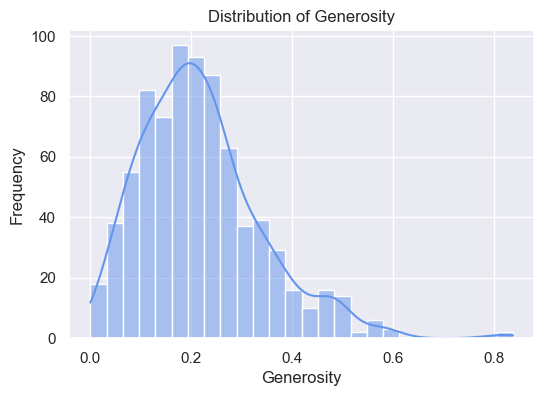

In [64]:
plt.figure(figsize=(6, 4))
sns.histplot(df['generosity'], kde=True, color='cornflowerblue')
plt.title('Distribution of Generosity')
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.show()

The asymmetric distribution to the right of the "generosity" column indicates that most observations tend to have lower values of generosity, while there are relatively fewer observations with higher values of generosity.

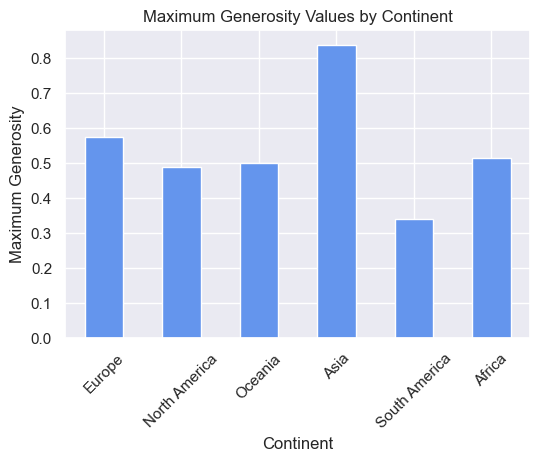

In [65]:
continent_generosity = df.groupby(['continent'], sort=False)['generosity'].max()

plt.figure(figsize=(6, 4))
continent_generosity.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum Generosity Values by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Generosity')
plt.xticks(rotation=45)
plt.show()

Asia shows the highest level of generosity, followed closely by Europe, Oceania and Africa. North America ranks in the middle, while South America shows the lowest level of average generosity among the continents. These differences reflect variations in cultural and social attitudes towards altruism and solidarity in different parts of the world.

#### Column perceptions of corruption

In [66]:
max_perceptions_of_corruption, min_perceptions_of_corruption = df['perceptions_of_corruption'].max(), df['perceptions_of_corruption'].min()
print(f"The maximum value of perceptions_of_corruption is: {max_perceptions_of_corruption}, and the minimum value is: {min_perceptions_of_corruption}")

The maximum value of perceptions_of_corruption is: 0.55191, and the minimum value is: 0.0


The minimum value of 0.0 suggests that there are observations in which no corruption is perceived. This could indicate that in some regions or countries represented in the data set, corruption is perceived to be virtually non-existent. On the other hand, the maximum value of 0.55191 indicates that there are observations where a relatively high level of corruption is perceived. This may reflect the presence of significant corruption problems in some countries.

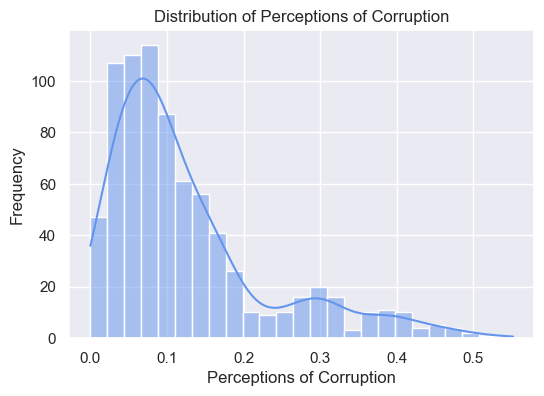

In [67]:
plt.figure(figsize=(6, 4))
sns.histplot(df['perceptions_of_corruption'], kde=True, color='cornflowerblue')
plt.title('Distribution of Perceptions of Corruption')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Frequency')
plt.show()

The asymmetric distribution to the right of the "perceptions_of_corruption" column suggests that most observations tend to have lower values of perceived corruption, while there are relatively fewer observations with higher values of perceived corruption.

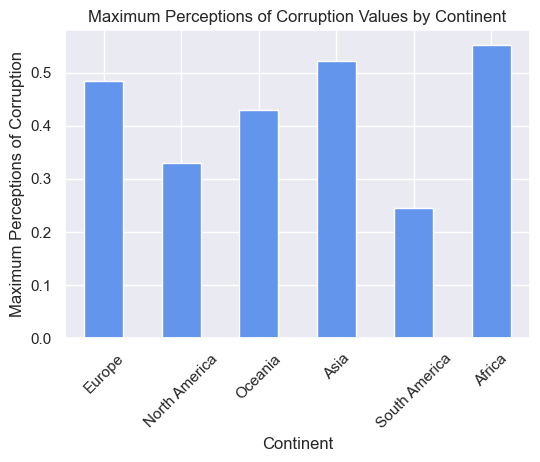

In [68]:
continent_corruption = df.groupby(['continent'], sort=False)['perceptions_of_corruption'].max()

plt.figure(figsize=(6, 4))
continent_corruption.plot(kind='bar', color='cornflowerblue')
plt.title('Maximum Perceptions of Corruption Values by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Perceptions of Corruption')
plt.xticks(rotation=45) 
plt.show()

These data highlight differences in perceptions of corruption between continents, with Africa leading in this regard and South America showing the lowest level. These differences may be influenced by a variety of factors, including the effectiveness of government institutions, transparency and political culture in each region.

#### Delete columns
We eliminate the happines rank and country columns since they will not be used for the reasons mentioned in the previous processes.

In [69]:
df.drop(columns={'happiness_rank', 'country'}, inplace=True)

Convert continents into dummy variables

In [70]:
continent_dummies = pd.get_dummies(df['continent']).astype(int)
df = pd.concat([df, continent_dummies], axis=1)
df.drop('continent', axis=1, inplace=True)

We rename the columns corresponding to the continents in order to manage a single format and avoid conflicts in the future.

In [71]:
columns_rename = {'Africa':'africa',
                'Asia':'asia',
                'Europe':'europe',
                'North America':'north_america',
                'Oceania':'oceania',
                'South America' : 'south_america',}

def col_rename(df : pd.DataFrame, column_names : dict):
    df.rename(columns=column_names, inplace=True)

col_rename(df, columns_rename)
df.head()

,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,perceptions_of_corruption,africa,asia,europe,north_america,oceania,south_america
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,0,0,1,0,0,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,0,0,1,0,0,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,0,0,1,0,0,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,0,0,1,0,0,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,0,0,0,1,0,0


### Model training
Two regression models will be evaluated to predict the `happiness_score` variable from a set of characteristics. The models used are linear regression and Random Forest.

The `train_test_split()` function is used to divide the feature (`X`) and target (`y`) sets into training (`X_train, y_train`) and testing (`X_test, y_test`) sets. Thirty percent of the data is reserved for the testing set, while seventy percent is allocated to the training set. Setting `random_state=50` ensures reproducibility, meaning the split will occur consistently each time the code is executed, maintaining result consistency.

In [72]:
X = df.drop('happiness_score', axis=1)
y = df['happiness_score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [73]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((235, 12), (546, 12), (235,), (546,))

- Training Set:

**X_train:** 546 samples, 12 features.

**y_train:** 546 samples.

- Test Set:

**X_test:** 235 samples, 12 features.

**y_test:** 235 samples.

##### Linear regression

In [74]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Mean squared error on the test set:", mse)
print("Coefficient of determination (R^2):", r2_linear)

Mean squared error on the test set: 0.23363054528833593
Coefficient of determination (R^2): 0.8223058070679303


##### Random Forest

In [75]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=50)

model_rfr.fit(X_train, y_train)

y_pred = model_rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error on the test set:", mse)
print("Coefficient of determination (R^2) on the test set:", r2)

Mean squared error on the test set: 0.1598583379521075
Coefficient of determination (R^2) on the test set: 0.8784153060516785


- Mean Squared Error (MSE): Measures the average of the squared errors between predicted and actual values. A lower value indicates better performance.
- R² (Coefficient of Determination): Indicates how well the predicted values explain the variability of the actual values. A value closer to 1 indicates a better model fit.

Knowing this the **random forest model** shows a better performance compared to linear regression, as it has a lower mean square error and a higher coefficient of determination. So this is the model chosen to work with


In [76]:
joblib.dump(model_rfr, 'model.pkl')

['model.pkl']

#### References
Admin, & Admin. (2023, 25 mayo). La felicidad: ¿cómo se mide y se alcanza? Gaceta UNAM. https://www.gaceta.unam.mx/la-felicidad-como-se-mide-y-se-alcanza/

Calidad en Laboratorios. (2020, 23 octubre). ¿Qué es y como se interpreta la regresión lineal? Interpretación gráfica del análisis de regresión [Vídeo]. YouTube. https://www.youtube.com/watch?v=iQ4V9pJC_Bk

El poder del Cómputo. (2022, 11 octubre). Entrenando un modelo de Bosque aleatorio || Random Forest en Python paso a paso 2022 [Vídeo]. YouTube. https://www.youtube.com/watch?v=AYICIq5jnhU

¿Qué es un bosque aleatorio? | IBM. (s. f.). IBM. https://www.ibm.com/mx-es/topics/random-forest

Kagleo. (2023, 16 noviembre). ☺️World Happiness Record EDA📈 & ML Regression💡. https://www.kaggle.com/code/kagleo123/world-happiness-record-eda-ml-regression

Programando con estilo. (2024, 1 febrero). Arquitectura de Mensajería con Apache Kafka y Docker 🐋 [Vídeo]. YouTube. https://www.youtube.com/watch?v=6MrDq6HAnI4

Saavedra, J. A. (2023, 3 mayo). Regresión Lineal: teoría y ejemplos. Ebac. https://ebac.mx/blog/regreson-lineal